# Implementation sur Python

Ce jeu de données contient 41 entrées, qui décrivent chacune les performances d'un athlète à une compétition de décathlon. Nous allons faire une ACP des dix variables décrivant les performances à chacune des épreuves du décathlon (100 mètres, saut en longueur, lancer de poids, saut en hauteur, 400 mètres, 110 mètres haies, lancer de disque, saut à la perche, javelot, et 1 500 mètres).

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# charger les données
data = pd.read_csv('data.txt', sep="\t")

# éliminer les colonnes que nous n'utiliserons pas
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)
print(my_data.head())

# transformer les données en array numpy
X = my_data.values

          100m  Long.jump  Shot.put  High.jump   400m  110m.hurdle  Discus  \
SEBRLE   11.04       7.58     14.83       2.07  49.81        14.69   43.75   
CLAY     10.76       7.40     14.26       1.86  49.37        14.05   50.72   
KARPOV   11.02       7.30     14.77       2.04  48.37        14.09   48.95   
BERNARD  11.02       7.23     14.25       1.92  48.93        14.99   40.87   
YURKOV   11.34       7.09     15.19       2.10  50.42        15.31   46.26   

         Pole.vault  Javeline  1500m  
SEBRLE         5.02     63.19  291.7  
CLAY           4.92     60.15  301.5  
KARPOV         4.92     50.31  300.2  
BERNARD        5.32     62.77  280.1  
YURKOV         4.72     63.44  276.4  


In [9]:
X.shape

(41, 10)

 
 Nous avons fait l'hypothèse que les données étaient centrées. Nous allons donc commencer par les standardiser.

In [29]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


### Calcul des composantes principales

Calculons maintenant les deux premières composantes principales

In [11]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

### Pourcentage de variance expliquée



In [12]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.32719055 0.1737131 ]
0.5009036561090068


La première composante explique environ un tiers de la variance observée dans les données, et la deuxième 17.3 %. Au total, ces deux composantes expliquent 50 % de la variance totale, en utilisant seulement un cinquième des dimensions initiales.

Nous pouvons représenter chaque athlète/compétition selon ces deux dimensions uniquement, et colorer chacun des points correspondants en fonction du classement de l'athlète lors de cette compétition.

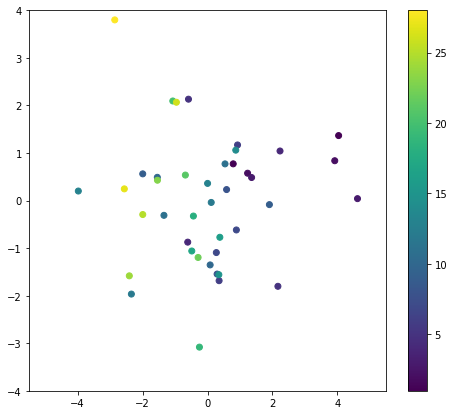

In [33]:
import matplotlib.pyplot as plt


# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
fig = plt.figure(figsize=(8,7))
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data.Rank)

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

### Contribution de chaque variable aux composantes principales

Pour mieux comprendre ce que capturent ces composantes principales, nous pouvons utiliser *pca.components_  , qui nous donne les coordonnées des composantes principales dans l'espace initial (celui à 10 variables). Nous allons afficher, pour chacune des 10 performances, un point dont l'abscisse sera sa contribution à la première PC, et l'ordonnée sa contribution à la deuxième PC.

Text(0, 0.5, 'PC 2')

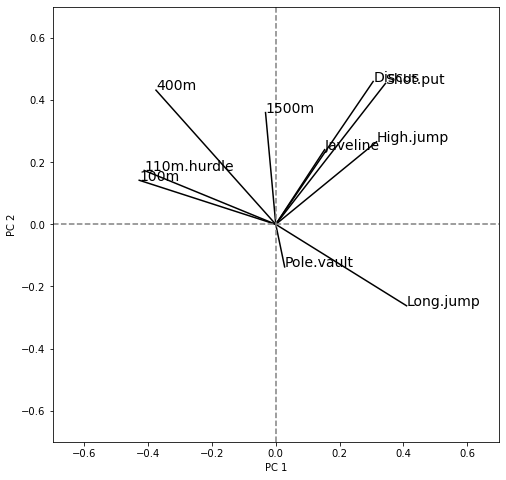

In [34]:
pcs = pca.components_

fig = plt.figure(figsize=(8,8))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
